# Importing Packages and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# importing data
df = pd.read_csv('products.csv')

# adding new column for bin category
df["bin"] = pd.qcut(df['price'], q=5)

# copy original data to 'newdf'
newdf = df.copy()
newdf

,product_ID,product_type,product_name,size,colour,price,quantity,description,bin
0,0,Shirt,Oxford Cloth,XS,red,114,66,"A red coloured, XS sized, Oxford Cloth Shirt","(112.0, 115.0]"
1,1,Shirt,Oxford Cloth,S,red,114,53,"A red coloured, S sized, Oxford Cloth Shirt","(112.0, 115.0]"
2,2,Shirt,Oxford Cloth,M,red,114,54,"A red coloured, M sized, Oxford Cloth Shirt","(112.0, 115.0]"
3,3,Shirt,Oxford Cloth,L,red,114,69,"A red coloured, L sized, Oxford Cloth Shirt","(112.0, 115.0]"
4,4,Shirt,Oxford Cloth,XL,red,114,47,"A red coloured, XL sized, Oxford Cloth Shirt","(112.0, 115.0]"
...,...,...,...,...,...,...,...,...,...
1255,1255,Trousers,Tracksuit Bottoms,XS,violet,91,67,"A violet coloured, XS sized, Tracksuit Bottoms...","(89.999, 95.0]"
1256,1256,Trousers,Tracksuit Bottoms,S,violet,91,48,"A violet coloured, S sized, Tracksuit Bottoms ...","(89.999, 95.0]"
1257,1257,Trousers,Tracksuit Bottoms,M,violet,91,73,"A violet coloured, M sized, Tracksuit Bottoms ...","(89.999, 95.0]"
1258,1258,Trousers,Tracksuit Bottoms,L,violet,91,45,"A violet coloured, L sized, Tracksuit Bottoms ...","(89.999, 95.0]"


In [3]:
# check on the composition of categorical variables
df[['product_type','product_name','size','colour']].describe()

,product_type,product_name,size,colour
count,1260,1260,1260,1260
unique,3,35,5,7
top,Shirt,Denim,XS,red
freq,420,70,252,180


In [4]:
# label-encoding on variables: product type, product_name, size and colour
label_encoder = LabelEncoder()

def label_data(df, var, var_new, dtype):
    df[var_new] = label_encoder.fit_transform(df[var])
    #df[var_new] = df[var_new].astype(dtype)
    #return df[var_new]


label_data(newdf, 'product_type', 'product_type_cat', 'category')
label_data(newdf, 'product_name', 'product_name_cat', 'category')
label_data(newdf, 'size', 'size_cat', 'category')
label_data(newdf, 'colour', 'colour_cat','category')
label_data(newdf, 'bin', 'bin_cat','category')

In [5]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   product_ID        1260 non-null   int64   
 1   product_type      1260 non-null   object  
 2   product_name      1260 non-null   object  
 3   size              1260 non-null   object  
 4   colour            1260 non-null   object  
 5   price             1260 non-null   int64   
 6   quantity          1260 non-null   int64   
 7   description       1260 non-null   object  
 8   bin               1260 non-null   category
 9   product_type_cat  1260 non-null   int64   
 10  product_name_cat  1260 non-null   int64   
 11  size_cat          1260 non-null   int64   
 12  colour_cat        1260 non-null   int64   
 13  bin_cat           1260 non-null   int64   
dtypes: category(1), int64(8), object(5)
memory usage: 129.6+ KB


In [6]:
# Obtain pairs for labeled variables

def paired_label(df, var1, var2):
    var1_pairset = set(list(zip(df[var1],df[var2])))
    print(f'{var1}\'s pair: {var1_pairset}')
    return var1_pairset

product_type_pair = paired_label(newdf, 'product_type', 'product_type_cat')
product_name_pair = paired_label(newdf, 'product_name', 'product_name_cat')
size_pair = paired_label(newdf, 'size', 'size_cat')
colour_pair = paired_label(newdf, 'colour', 'colour_cat')
bin_pair = paired_label(newdf, 'bin', 'bin_cat')

product_type's pair: {('Trousers', 2), ('Jacket', 0), ('Shirt', 1)}
product_name's pair: {('Peacoat', 23), ('Pullover', 27), ('Cargo Pants', 3), ('Cardigan', 2), ('Pleated', 24), ('Slim-Fit', 30), ('Windbreaker', 33), ('Casual Slim Fit', 4), ('Oxford Cloth', 21), ('Trench Coat', 32), ('Dress', 13), ('Cuban Collar', 10), ('Flannel', 14), ('Denim', 11), ('Polo', 25), ('Relaxed Leg', 28), ('Chinos', 6), ('Wool', 34), ('Cropped', 9), ('Drawstring', 12), ('Puffer', 26), ('Joggers', 17), ('Shearling', 29), ('Tracksuit Bottoms', 31), ('Mandarin Collar', 20), ('Chambray', 5), ('Bomber', 0), ('Cords', 8), ('High-Waisted', 16), ('Linen', 19), ('Henley', 15), ('Parka', 22), ('Coach', 7), ('Camp Collared', 1), ('Leather', 18)}
size's pair: {('S', 2), ('L', 0), ('XL', 3), ('XS', 4), ('M', 1)}
colour's pair: {('red', 4), ('yellow', 6), ('violet', 5), ('indigo', 2), ('green', 1), ('orange', 3), ('blue', 0)}
bin's pair: {(Interval(95.0, 104.0, closed='right'), 1), (Interval(89.999, 95.0, closed='right

In [8]:
# splitting data by 8 over 2
train, test = train_test_split(newdf, test_size=0.20)
x_train, y_train = train.drop(["price", "bin", "description", "product_ID", "product_type", "product_name", "size", "colour","bin_cat"], axis = 1), train[['bin_cat']]
x_test, y_test = test.drop(["price", "bin", "description", "product_ID", "product_type", "product_name", "size", "colour","bin_cat"], axis = 1), test[['bin_cat']]

In [9]:
x_train

,quantity,product_type_cat,product_name_cat,size_cat,colour_cat
410,57,1,4,4,2
192,41,1,1,1,1
565,80,0,0,4,3
1023,78,2,28,0,3
109,63,1,11,3,4
...,...,...,...,...,...
939,41,2,12,3,2
525,67,0,18,4,4
398,63,1,4,0,6
42,53,1,13,1,3


In [10]:
y_train

,bin_cat
410,3
192,2
565,0
1023,0
109,3
...,...
939,1
525,3
398,3
42,4


#  Naïve Bayes Classifier

In [11]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

gnb = GaussianNB()
standardize = StandardScaler()

x_train_sc = standardize.fit_transform(x_train)
x_test_sc = standardize.transform(x_test)

y_pred = gnb.fit(x_train_sc, y_train).predict(x_test_sc)

print(classification_report(y_test, y_pred))
#print(classification_report(y_test, gnb.predict(scaler.transform(X_test))))

              precision    recall  f1-score   support

           0       0.35      0.40      0.37        65
           1       0.63      0.83      0.72        41
           2       0.61      0.39      0.47        59
           3       0.32      0.66      0.43        38
           4       0.29      0.04      0.07        49

    accuracy                           0.44       252
   macro avg       0.44      0.46      0.41       252
weighted avg       0.44      0.44      0.40       252



/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# K-Nearest Neighbors Classifier

0.49603174603174605


/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/alliewu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d ar

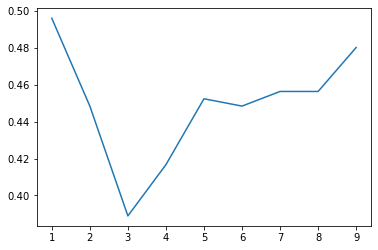

In [12]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

scores = {}
scores_list = []
  
for k in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(range(1, 10), scores_list)
print(max(scores_list))